In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [39]:
df1 = pd.read_csv('BX-Book-Ratings.csv', sep='\";\"', names=['User-ID', 'ISBN', 'Book-Rating'], encoding='latin-1', skiprows=1)
df2 = pd.read_csv('BX-Users.csv', sep='\";\"', names=['User-ID', 'Location', 'Age'], encoding='latin-1', skiprows=1)
df3 = pd.read_csv('BX-Books.csv', sep='\";\"', names=['ISBN', 'Book-Title' ,'Book-Author','Year-Of-Publication', 'Publisher', 'Image-Url-S', 'Image-Url-M', 'Image-Url-L'], encoding='latin-1', skiprows=1)

<ipython-input-39-8c31a89acb76>:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

<ipython-input-39-8c31a89acb76>:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

<ipython-input-39-8c31a89acb76>:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [40]:
df2['User-ID'] = df2['User-ID'].str.replace("\"","")
df2['Location'] = df2['Location'].str.replace("\";NULL","")
df2['Age'] = df2['Age'].fillna("0")
df2['Age'] = df2['Age'].str.replace("\"","")
df3['ISBN'] = df3['ISBN'].str.replace("\"","")
df3['Book-Title'] = df3['Book-Title'].str.replace("\"","")
df1['User-ID'] = df1['User-ID'].str.replace("\"","")
df1['Book-Rating'] = df1['Book-Rating'].str.replace("\"","").astype(int)

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  object
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 26.3+ MB


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278859 non-null  object
 1   Location  278858 non-null  object
 2   Age       278859 non-null  object
dtypes: object(3)
memory usage: 6.4+ MB


In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271378 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-Url-S          271379 non-null  object
 6   Image-Url-M          271379 non-null  object
 7   Image-Url-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [44]:
# remove 'DK Publishing Inc', 'Gallimard' values from 'Year-Of-Publication' column and convert to int
df3 = df3[~df3['Year-Of-Publication'].isin(['DK Publishing Inc', 'Gallimard'])]
df3['Year-Of-Publication'] = pd.to_numeric(df3['Year-Of-Publication'])

* Dataset 1 - Rating.csv (11149780)
    * User-ID - user ID
    * ISBN - book ID
    * Book-Rating - Rating given by user
    
* Dataset 2 - Users.csv (278858)
    * User-ID - user ID
    * Location - location of user
    * Age - age of user

* Dataset 3 - Books.csv (271360)
    * ISBN - book ID
    * Book-Title - Book Name
    * Book-Author
    * Year-Of-Publication
    * Publisher
    * Image-URL-S
    * Image-URL-M
    * Image-URL-L

# EDA

In [45]:
def plot_distribution(feature, data):
    sns.displot(x=feature, data=data, kde=True, color='#244747');
    plt.figtext(0.2, 1, '%s Distribution'%feature, fontfamily='serif', fontsize=17, fontweight='bold');

In [47]:
df2 = df2[int(df2['Age']) <= 120 ]
# Distribution of user as per age
plot_distribution('Age', df2)

TypeError: cannot convert the series to <class 'int'>

remove users with age above 120

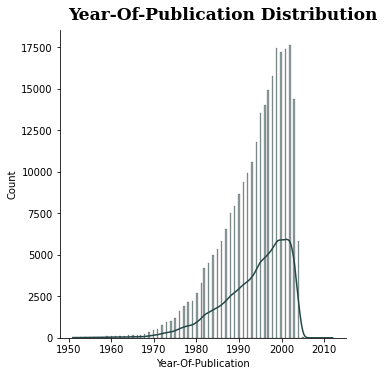

In [9]:
df3 = df3[(df3['Year-Of-Publication']>1950) & (df3['Year-Of-Publication']<=2016)]
# Distribution across year of publication
plot_distribution('Year-Of-Publication', df3)

remove books before 1950 as there are not many and before 2016

# Recommender 2: Collaborative Filtering
Based on records from various users provide recommendations based on user similarities

In [ ]:
# merge df1 and df5 to get movie titles and drop rows for which title is not available
data = pd.merge(df1, df3, on='ISBN')

# get total counts of no. of occurence of book
data['count'] = data.groupby('ISBN').transform('count')['User-ID']

# fetch top 100 books based on count
isbn = data.drop_duplicates('ISBN').sort_values(
    'count', ascending=False).iloc[:100]['ISBN']

# filter out data as per the ISBN
data = data[data['ISBN'].isin(isbn)].reset_index(drop=True)

In [ ]:
# create a user book rating matrix
df = data.pivot(index='User-ID', columns='ISBN', values='Book-Rating')
df.head()

In [ ]:
# get user-ID for users who have read more than 50 books
temp = df[~df.isna()].count(axis=1).reset_index()
temp[temp[0]>50]

## 1. Using Surpise Library

In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split, cross_validate

In [ ]:
reader = Reader(rating_scale=(0, 10))
surprise_data = Dataset.load_from_df(data[['User-ID', 'ISBN', 'Book-Rating']], reader)
trainset, testset = train_test_split(surprise_data, test_size=0.25)

In [ ]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD()]:
    # Perform cross validation
    results = cross_validate(algorithm, surprise_data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 

In [ ]:
svd = SVD() 
svd.fit(trainset)

In [ ]:
index_val = 2131
# get user id
userId = df.index[index_val]
books = []
ratings = []
titles = []

for isbn in df.iloc[index_val][df.iloc[index_val].isna()].index:
    books.append(isbn)
    title = data[data['ISBN']==isbn]['Book-Title'].values[0]
    titles.append(title)
    ratings.append(svd.predict(userId, isbn).est)

prediction = pd.DataFrame({'ISBN':books, 'title':titles, 'rating':ratings, 'userId':userId})  
prediction = prediction.sort_values('rating', ascending=False).iloc[:10].reset_index(drop=True)

# get other high rated books by user
temp = data[data['User-ID']==df.index[index_val]].sort_values(
    'Book-Rating', ascending=False)[['Book-Rating', 'Book-Title', 'User-ID']].iloc[:10].reset_index(drop=True)
prediction['Book Read'] = temp['Book-Title']
prediction['Rated']= temp['Book-Rating']
prediction

In [ ]:
index_val = 912
# get user id
userId = df.index[index_val]
books = []
ratings = []
titles = []

for isbn in df.iloc[index_val][df.iloc[index_val].isna()].index:
    books.append(isbn)
    title = data[data['ISBN']==isbn]['Book-Title'].values[0]
    titles.append(title)
    ratings.append(svd.predict(userId, isbn).est)

prediction = pd.DataFrame({'ISBN':books, 'title':titles, 'rating':ratings, 'userId':userId})  
prediction = prediction.sort_values('rating', ascending=False).iloc[:10].reset_index(drop=True)

# get other high rated books by user
temp = data[data['User-ID']==df.index[index_val]].sort_values(
    'Book-Rating', ascending=False)[['Book-Rating', 'Book-Title', 'User-ID']].iloc[:10].reset_index(drop=True)
prediction['Book Read'] = temp['Book-Title']
prediction['Rated']= temp['Book-Rating']
prediction

## 2. Using mean of other user' weighted ratings based on similarity matrix
Here assumed rating may not make much sense as most of the books are not read by other users

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# replace NaN with user based average rating in pivot dataframe
df_imputed = df.fillna(df.mean(axis=0))

# get similarity between all users
similarity_matrix = cosine_similarity(df_imputed.values)

In [ ]:
def get_recommendation(user_index):
    idx = user_index
    sim_scores = list(enumerate(similarity_matrix[idx]))

    # get books that are unrated by the given user
    unrated_books = df.iloc[idx][df.iloc[idx].isna()].index

    # get weighted ratings of unrated books by all other users
    book_ratings = (df[unrated_books].T * similarity_matrix[idx]).T

    # get top 100 similar users by skipping the current user
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:101]

    # get mean of book ratings by top 100 most similar users for the unrated books
    book_ratings = book_ratings.iloc[[x[0] for x in sim_scores]].mean()
    
    # get rid of null values and sort it based on ratings
    book_ratings = book_ratings.reset_index().dropna().sort_values(0, ascending=False).iloc[:10]
    
    # get recommended book titles in sorted order
    recommended_books = data[data['ISBN'].isin(book_ratings['ISBN'])][['ISBN', 'Book-Title']]
    recommended_books = recommended_books.drop_duplicates('ISBN').reset_index(drop=True)
    assumed_ratings = book_ratings[0].reset_index(drop=True)

    return pd.DataFrame({'ISBN':recommended_books['ISBN'], 
                         'Recommended Book':recommended_books['Book-Title'], 
                         'Assumed Rating':assumed_ratings})

In [ ]:
user_index = 2131
recommended_books = get_recommendation(user_index)
# get other high rated books by user
temp = data[data['User-ID']==df.index[user_index]].sort_values(
    'Book-Rating', ascending=False)[['Book-Rating', 'Book-Title', 'User-ID']].iloc[:10].reset_index(drop=True)
recommended_books['userId'] = temp['User-ID']
recommended_books['Book Read'] = temp['Book-Title']
recommended_books['Rated']= temp['Book-Rating']
recommended_books

In [ ]:
user_index = 6349
recommended_books = get_recommendation(user_index)
# get other high rated books by user
temp = data[data['User-ID']==df.index[user_index]].sort_values(
    'Book-Rating', ascending=False)[['Book-Rating', 'Book-Title', 'User-ID']].iloc[:10].reset_index(drop=True)
recommended_books['userId'] = temp['User-ID']
recommended_books['Book Read'] = temp['Book-Title']
recommended_books['Rated']= temp['Book-Rating']
recommended_books